In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films'
text_data = requests.get(url).text

In [4]:
soup = BeautifulSoup(text_data, 'html.parser')

In [5]:
films = []
rows = soup.find_all('tr')

for row in rows[1:]:              
    cols = row.find_all('td')
    if len(cols) >= 3:             
        name = cols[0].text.strip()
        year = cols[1].text.strip()
        award = cols[2].text.strip()

        films.append({'Name' : name, 'Year' : year, 'Award' : award})

In [6]:
df = pd.DataFrame(films)
df

,Name,Year,Award
0,Anora,2024,5
1,The Brutalist,2024,3
2,Emilia Pérez,2024,2
3,Wicked,2024,2
4,Dune: Part Two,2024,2
...,...,...,...
1382,The Yankee Doodle Mouse,1943,1
1383,The Yearling,1946,2
1384,"Yesterday, Today and Tomorrow (Ieri, oggi, dom...",1964,1
1385,You Can't Take It with You,1938,2


In [7]:
#Save the data as a CSV file.

df.to_csv('awarded_films.csv', index = False) 

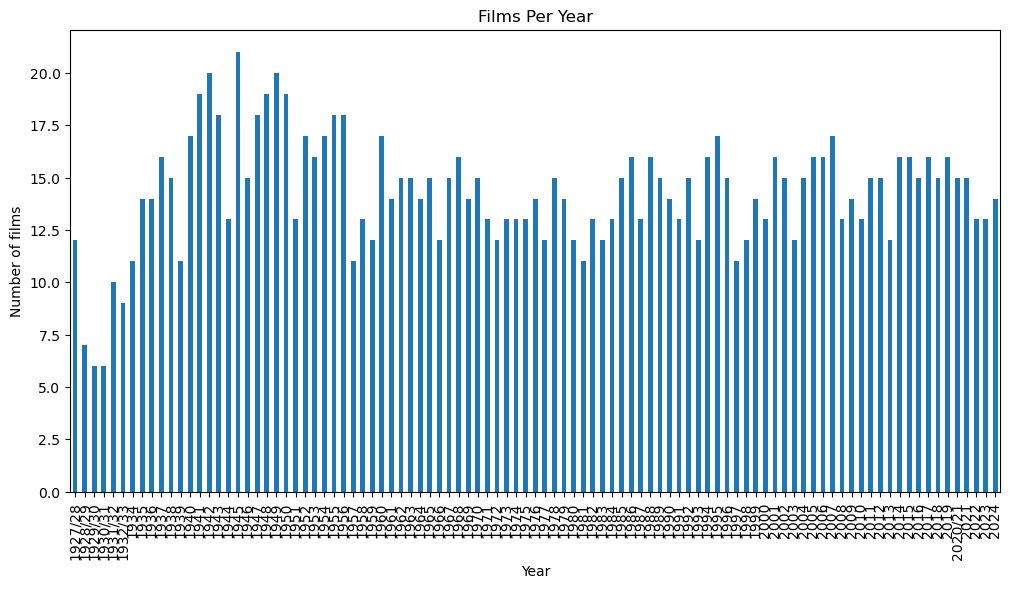

In [8]:
#How many films were nominated each year? Show with a graph.

films_per_year = df['Year'].value_counts().sort_index() 

plt.figure(figsize=(12,6))
films_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of films')
plt.title('Films Per Year')
plt.show()

In [9]:
#What are the top 5 films with the most awards?

top5 = df.sort_values(by='Award', ascending=False).head(5) 
top5

,Name,Year,Award
403,The English Patient,1996,9
1012,Gigi,1958,9
536,The Last Emperor,1987,9
1021,Gone with the Wind,1939,8 (2)
605,Gandhi,1982,8
